## Validacion con test estadístico: Welch

In [1]:
from bootstrap import * 
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
%matplotlib inline

Cargo los dataframes para calcular welch, el código esta comentado para que no se corra de nuevo. Los resultados ya estan guardados en .csv listos para cargar

In [2]:

# ivalues = 'notebooks/ivalue_entropia_personas_palabras.csv'
# df2 = pd.DataFrame.from_csv(ivalues,header=0,encoding='utf-8')

# # listado de todas las provincias de argentina
# provincias = ['jujuy',  'catamarca',  'sanjuan',  'salta',  'rionegro',  'lapampa',  'chaco',
#                'mendoza',  'buenosaires',  'entrerios',  'chubut',  'santacruz',  'neuquen',
#                'misiones',  'corrientes',  'formosa',  'santafe',  'santiago',  'cordoba',  'larioja',  'tierradelfuego',  'tucuman',  'sanluis']


# # el path donde se encuentran los .csv con la cantidad de ocurrencias de cada palabra por cada usuario.
# # hay un csv por cada provincia, con el nombre [nombreProvincia].csv
# path = './dataUsuarios/filtrado/'


# # leo todos los .csv de cada provincia y creo variables con los dataframes de cada provincia con su nombre respectivo.
# # ej. la variable buenosaires va a tener el dataframe de buenos aires

# freqs = {}
# for p in provincias:
#     start = datetime.datetime.now()
#     freqs[p] = pd.DataFrame.from_csv(path = path+p+'.csv',encoding='utf-8') # probar con encoding='utf-8'
#     end = datetime.datetime.now()
#     print(p,str(end-start))



In [3]:
# start = datetime.datetime.now()
# df3 = pd.DataFrame()
# df3.loc[:,'pvalorWelch'] = df2.apply(lambda x: welch(x.name,df2,freqs,provincias),axis=1)
# df3.to_csv('./testEstadisticos/welchTest.csv',encoding='utf-8')
# end = datetime.datetime.now()
# print("welch: ",str(end-start))

In [4]:
#cargo el dataframe con el resultado de haber aplicado welch a todas las palabras
df3 = pd.DataFrame.from_csv("testEstadisticos/welchTest.csv",encoding='utf-8')

In [5]:
ivalues = 'notebooks/ivalue_entropia_personas_palabras.csv'
df2 = pd.DataFrame.from_csv(ivalues,header=0,encoding='utf-8')

In [6]:

candidatas = pd.DataFrame.from_csv("definitivo.csv",encoding="utf-8")
candidatas = candidatas[candidatas["Palabra Candidata"]=="1"].index
candidatas_df = df3.loc[candidatas]
p_adjusted = multipletests(candidatas_df.pvalorWelch, method='bonferroni')
candidatas_df["p_adjusted"] = p_adjusted[1]
candidatas_df["rechazo_H0"] = p_adjusted[0]


In [7]:
# agrego la posicion en base a la metrica elegida que tenia en cuenta la entropia de las palabras y de las personas
df4 = pd.merge(candidatas_df, df2, left_index=True,right_index=True)

[]

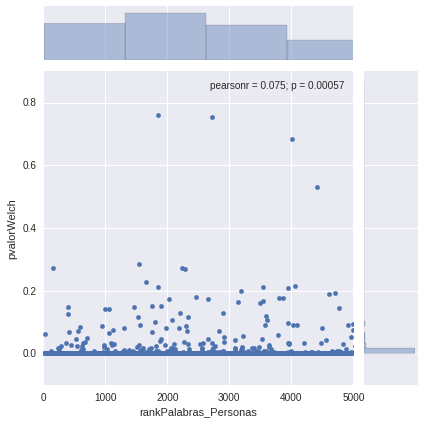

In [8]:
df4[["pvalorWelch","rankPersonas","rankPalabras_Personas"]]
sns.jointplot(x="rankPalabras_Personas", y="pvalorWelch", data=df4,kind="scatter",size=6,xlim=[0,5000]);
# df4.plot(x='rankPalabras_Personas',y="pvalorWelch")
plt.plot(x=[0,5000],y=[0.05,0.05], linewidth=2)

Gráfico de pvalores respecto a la posición

[]

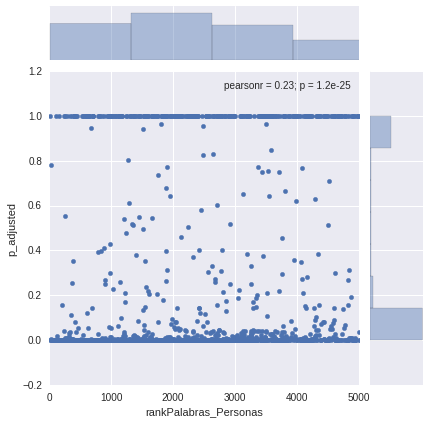

In [9]:
sns.jointplot(x="rankPalabras_Personas", y="p_adjusted", data=df4,kind="scatter",size=6,xlim=[0,5000]);
# df4.plot(x='rankPalabras_Personas',y="pvalorWelch")
plt.plot(x=[0,5000],y=[0.05,0.05], linewidth=2)

In [10]:
candidatas

Index([       u'cldo',   u'fueguinos',       u'aijue',  u'alvearense',
          u'fueguino',    u'malpegue', u'comodorense', u'rionegrinos',
             u'mitai',       u'yarca',
       ...
           u'guasada',         u'asa',         u'pio',       u'pinga',
           u'charros',     u'cumpaaa',     u'tortita',      u'charro',
            u'yutaaa',      u'fayuta'],
      dtype='object', name=u' ', length=2103)

In [11]:
candidatas_df.shape

(2103, 3)

Tasa de rechazo de $H_0$ para las palabras candidatas

In [12]:
tasa_rechazoH0 = candidatas_df.rechazo_H0.mean()*100
print("La tasa de rechazo de sobre las palabras candidatas CON la corrección de Bonferroni es de {0}".format(tasa_rechazoH0))
print("La tasa de rechazo de sobre las palabras candidatas SIN la corrección de Bonferroni es de {0}".format((candidatas_df.pvalorWelch<0.05).mean()*100))

La tasa de rechazo de sobre las palabras candidatas CON la corrección de Bonferroni es de 59.961959106
La tasa de rechazo de sobre las palabras candidatas SIN la corrección de Bonferroni es de 94.2938659058


Tasa de rechazo de $H_0$ para todas las palabras (con más de 40 ocurrencias o dichas por más de 5 usuarios)

In [13]:
todas_df = pd.DataFrame.from_csv("testEstadisticos/welchTest.csv",encoding='utf-8')
p_adjusted = multipletests(todas_df.pvalorWelch, method='bonferroni')
todas_df["p_adjusted"] = p_adjusted[1]
todas_df["rechazo_H0"] = p_adjusted[0]
tasa_rechazoH0 = todas_df.rechazo_H0.mean()*100
print("La tasa de rechazo de sobre todas las palabras CON la correción de Bonferroni es de {0}".format(tasa_rechazoH0))
print("La tasa de rechazo de sobre todas las palabras SIN la correción de Bonferroni es de {0}".format((todas_df.pvalorWelch<0.05).mean()*100))

La tasa de rechazo de sobre todas las palabras CON la correción de Bonferroni es de 12.0812356678
La tasa de rechazo de sobre todas las palabras SIN la correción de Bonferroni es de 83.2336118506


La correción de Bonferroni consiste en rechazar la hipótesis nula para todos los $p_i$ que cumplen $ p_{i}\leq {\frac {\alpha }{m}}$, siendo m la cantidad de tests realizados

Las palabras candidatas que no fueron rechazadas

In [14]:
palabras_candidatas_no_rechazadas = candidatas_df[candidatas_df.rechazo_H0 == False].index
palabras_candidatas_no_rechazadas

Index([   u'fueguinos',        u'aijue',   u'alvearense',  u'rionegrinas',
            u'obereño',      u'yaganes',        u'mentu',       u'viorsi',
       u'comodorenses',       u'atinar',
       ...
         u'esculpidas', u'automotrices',     u'culiadaa',        u'cumpa',
            u'guasada',          u'asa',        u'pinga',      u'charros',
             u'charro',       u'yutaaa'],
      dtype='object', name=u' ', length=842)

Las palabras candidatas que fueron rechazadas:

In [15]:
palabras_candidatas_rechazadas = candidatas_df[candidatas_df.rechazo_H0 == True].index
palabras_candidatas_rechazadas

Index([u'cldo', u'fueguino', u'malpegue', u'comodorense', u'rionegrinos',
       u'mitai', u'yarca', u'sinf', u'yf', u'aij',
       ...
       u'largame', u'ieee', u'cora', u'mansito', u'tombola', u'asadaso',
       u'pio', u'cumpaaa', u'tortita', u'fayuta'],
      dtype='object', name=u' ', length=1261)

## Histograma de pvalores de palabras candidatas

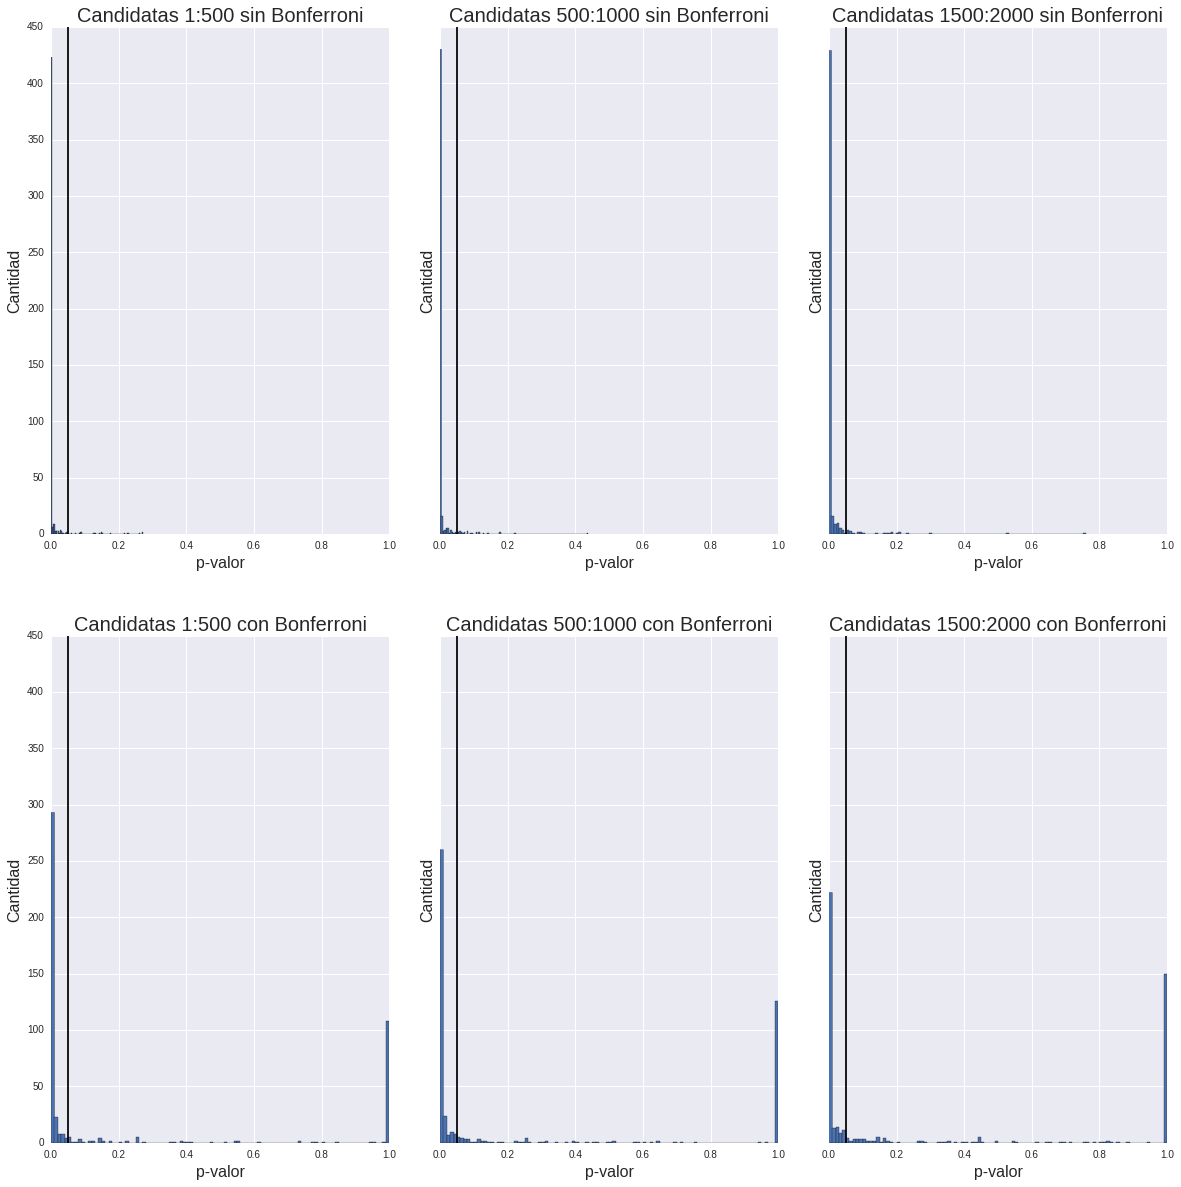

In [16]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,figsize = (20,20))
candidatas_df.pvalorWelch.iloc[1:500].hist(ax=axs[0][0],bins=100)
candidatas_df.pvalorWelch.iloc[500:1000].hist(ax=axs[0][1],bins=100)
candidatas_df.pvalorWelch.iloc[1500:2000].hist(ax=axs[0][2],bins=100)
candidatas_df.p_adjusted.iloc[1:500].hist(ax=axs[1][0],bins=100)
candidatas_df.p_adjusted.iloc[500:1000].hist(ax=axs[1][1],bins=100)
candidatas_df.p_adjusted.iloc[1500:2000].hist(ax=axs[1][2],bins=100)
fig.subplots_adjust(hspace=.2)
fig.subplots_adjust(wspace=.15)
for ax in axs.flatten():
    ax.set_xlabel("p-valor",fontsize=16)
    ax.set_ylabel("Cantidad",fontsize=16)
    ax.set_xlim([0,1])
    ax.axvline(0.05, color='black')
axs[0][0].set_title("Candidatas 1:500 sin Bonferroni",fontsize=20)
axs[0][1].set_title("Candidatas 500:1000 sin Bonferroni",fontsize=20)
axs[0][2].set_title("Candidatas 1500:2000 sin Bonferroni",fontsize=20)
axs[1][0].set_title("Candidatas 1:500 con Bonferroni",fontsize=20)
axs[1][1].set_title("Candidatas 500:1000 con Bonferroni",fontsize=20)
axs[1][2].set_title("Candidatas 1500:2000 con Bonferroni",fontsize=20)


Se puede ver con la correccion de bonferroni, que a medida que agarramos palabras menos contrastivas segun la metrica se rechaza la hipotesis nula con menor frecuencia

## Histograma de pvalores de todas las palabras

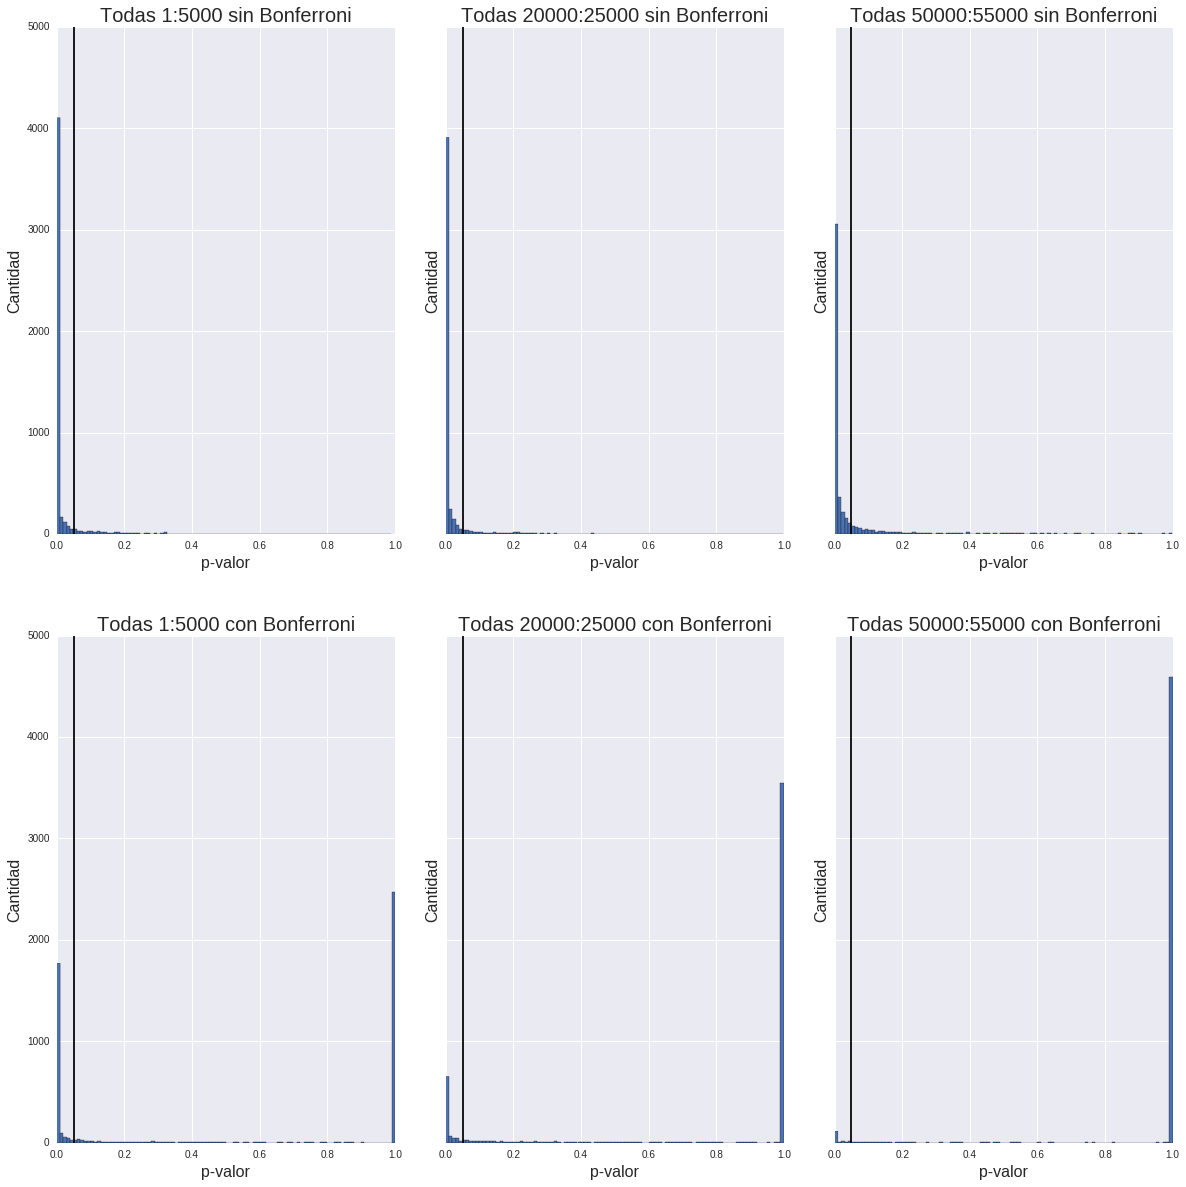

In [17]:
fig, axs = plt.subplots(nrows=2,ncols=3,sharey=True,figsize = (20,20))
todas_df.pvalorWelch.iloc[1:5000].hist(ax=axs[0][0],bins=100)
todas_df.pvalorWelch.iloc[20000:25000].hist(ax=axs[0][1],bins=100)
todas_df.pvalorWelch.iloc[50000:55000].hist(ax=axs[0][2],bins=100)
todas_df.p_adjusted.iloc[1:5000].hist(ax=axs[1][0],bins=100)
todas_df.p_adjusted.iloc[20000:25000].hist(ax=axs[1][1],bins=100)
todas_df.p_adjusted.iloc[50000:55000].hist(ax=axs[1][2],bins=100)
fig.subplots_adjust(hspace=.2)
fig.subplots_adjust(wspace=.15)
for ax in axs.flatten():
    ax.set_xlabel("p-valor",fontsize=16)
    ax.set_ylabel("Cantidad",fontsize=16)
    ax.set_xlim([0,1])
    ax.axvline(0.05, color='black')
axs[0][0].set_title("Todas 1:5000 sin Bonferroni",fontsize=20)
axs[0][1].set_title("Todas 20000:25000 sin Bonferroni",fontsize=20)
axs[0][2].set_title("Todas 50000:55000 sin Bonferroni",fontsize=20)
axs[1][0].set_title("Todas 1:5000 con Bonferroni",fontsize=20)
axs[1][1].set_title("Todas 20000:25000 con Bonferroni",fontsize=20)
axs[1][2].set_title("Todas 50000:55000 con Bonferroni",fontsize=20)

Ahora con todas las palabras, si se observan los gráficos con la correccion de bonferroni, a medida que agarramos palabras menos contrastivas segun la metrica se rechaza la hipotesis nula con menor frecuencia

Ahora comparemos los histogramas de rechazo entre las primeras 5000 y el resto de las palabras

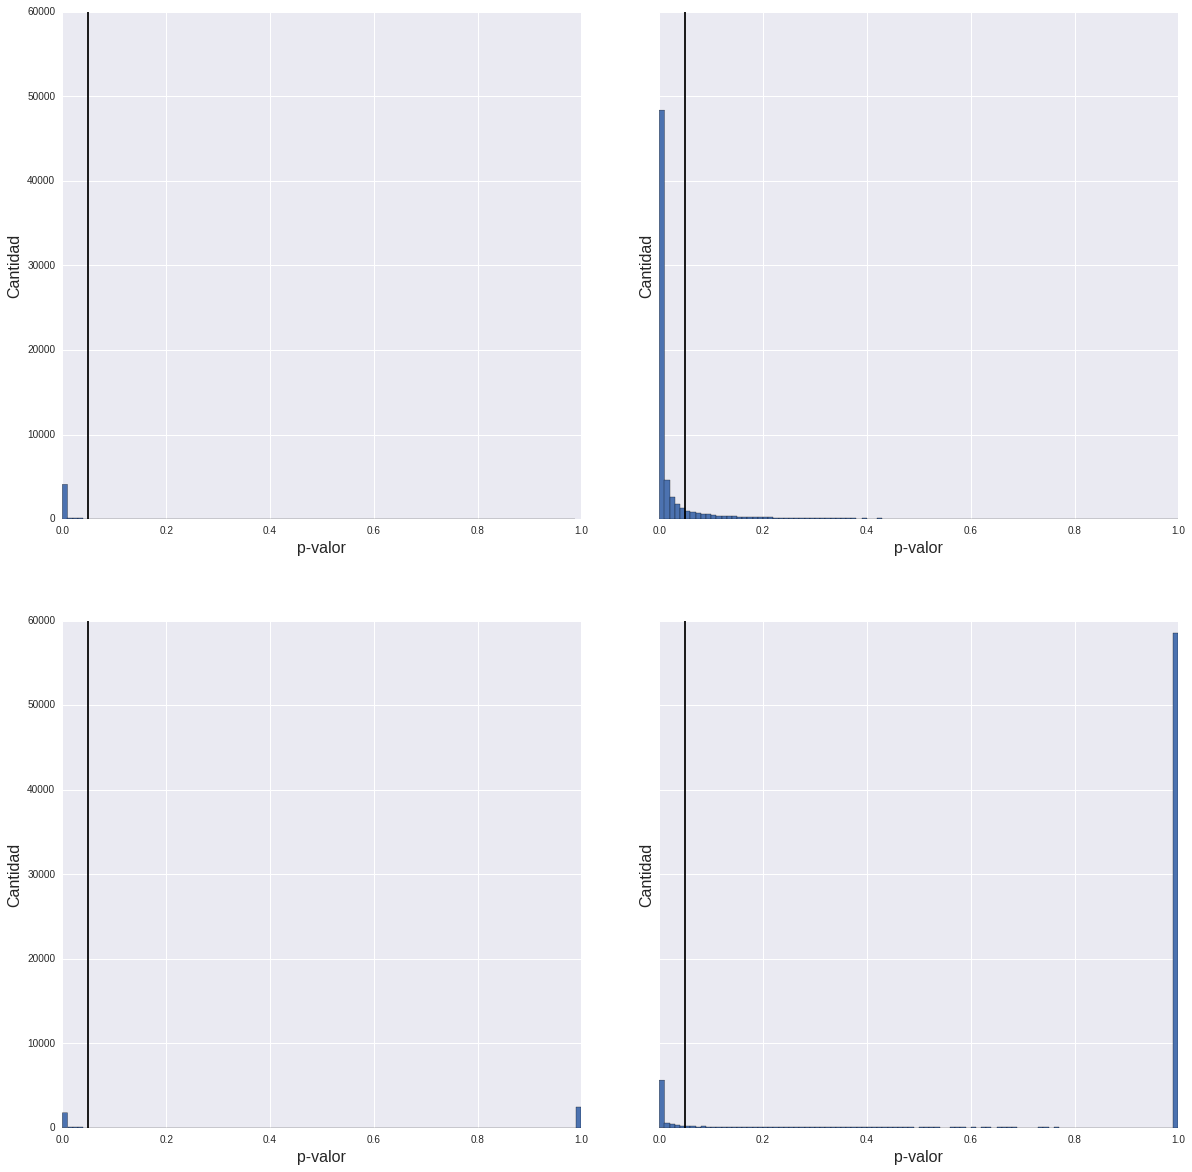

In [18]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharey=True,figsize = (20,20))
todas_df.pvalorWelch.iloc[1:5000].hist(ax=axs[0][0],bins=100)
todas_df.pvalorWelch.iloc[5000:].hist(ax=axs[0][1],bins=100)
todas_df.p_adjusted.iloc[1:5000].hist(ax=axs[1][0],bins=100)
todas_df.p_adjusted.iloc[5000:].hist(ax=axs[1][1],bins=100)
fig.subplots_adjust(hspace=.2)
fig.subplots_adjust(wspace=.15)
for ax in axs.flatten():
    ax.set_xlabel("p-valor",fontsize=16)
    ax.set_ylabel("Cantidad",fontsize=16)
    ax.set_xlim([0,1])
    ax.axvline(0.05, color='black')

Vemos que las primeras 5000 palabras elegidas de acuerdo a nuestra metrica
tienen un rechazo aproximado del 50%, mientras que en el resto de las palabras se rechaza la gran minoria

Quería comparar las metricas elegidas, dado que hemos tenido esta discusion:
que metrica elegimos? la que tiene en cuenta la entropia de las palabras, la de las personas o la de ambos.
Como lo supusimos, la de personas es mejor que la de palabras y la metrica elegida (que tiene en cuenta ambas) es ampliamente superior. 👏 👏 👏 

In [19]:
metricas = ["rankPalabras_Personas","rankPalabras","rankPersonas"]
for cant_pal in [5000,10000]:
    print('\n')
    for m in metricas:
        tasa_r = (todas_df.loc[df2[df2[m]<cant_pal].index].rechazo_H0).mean()*100
        print("Tasa de rechazo para las primeras {0} palabras según la metrica {1}: {2}".format(cant_pal,m,tasa_r))





Tasa de rechazo para las primeras 5000 palabras según la metrica rankPalabras_Personas: 40.0480096019
Tasa de rechazo para las primeras 5000 palabras según la metrica rankPalabras: 19.3438687738
Tasa de rechazo para las primeras 5000 palabras según la metrica rankPersonas: 29.325865173


Tasa de rechazo para las primeras 10000 palabras según la metrica rankPalabras_Personas: 35.3535353535
Tasa de rechazo para las primeras 10000 palabras según la metrica rankPalabras: 18.2318231823
Tasa de rechazo para las primeras 10000 palabras según la metrica rankPersonas: 25.8625862586
